<a href="https://colab.research.google.com/github/parhamvz73/Machine-Learning/blob/main/Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0 : pre-start phase for setup and prepration

we keep all the installations and tools and libraries here to make sure code is readable and transparent for other users

## Essential installations

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

## Cheking the python version we are using

In [7]:
import sys
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


## Checking the device we are using CPU vs GPU

So we are using python version 3.12.11 and we are good to go and move on to checking the device (CPU vs GPU) we are using in this notebook

In [8]:
device_name = tf.test.gpu_device_name()
if device_name:
  print(f"You are currently using GPU and device is: {device_name}")
else:
  print("You are currently using CPU")

You are currently using CPU


Using CPU for such a small data set ( Titanic disaster should be enough and efficient so we dont need to change our Runtime type)

## Importing our data set from data folder

Our data set is already uploaded to our google drive and with pandas we will read the csv but to keep the code clean and having reusable code we proceed with creating a function for that

In [19]:
def read_csv (path = str):
  """
  this function will read and print out the sucess message together with the shape and dtypes of our csv file
  if file was not found we will get the error message

  Parameters
  ----------
  path: str
     the path of the url of the csv file as string between "" or ' '
  """
  try:
    dataframe = pd.read_csv(path)
    print(f" Data is successfully imported from the path: {path}\n")
    print(f" Our data set has also the shape of: \n")
    print(dataframe.shape)
    print(f"Our data set has also missing values and data types as: \n")
    print(dataframe.info())
    return dataframe
  except Exception as e:
    print(f"there is an error reading the file: {e}\n")
    return None

Since now we have the function to read the csv file we will try to read the traing csv file for Titanic data set

In [20]:
df = read_csv("/content/drive/MyDrive/ML Projects/Titanic-Disaster/data/train.csv")

 Data is successfully imported from the path: /content/drive/MyDrive/ML Projects/Titanic-Disaster/data/train.csv

 Our data set has also the shape of: 

(891, 12)
Our data set has also missing values and data types as: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Now we check if data set is stored correctly as our variable called `df`

In [21]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [24]:
df.iloc[100:110]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


## checklist for Step 0

- ✅ Installed required libraries so far and dependencies (numpy, pandas, tensorflow for device detection, ...)
- ✅ Verified python version we will use through out this Projects ( we are using python 3.12.11)
- ✅ Checked the device we are using  (CPU)
- ✅ Imported csv file as df
- ✅ Performed a quick check on train data info and head and tail and iloc

# Step 1: Project overview and problem definition

## Project briefing

**Project Title:**

Titanic Disaster

---
**My enhanced Title:**

Predicting Survival on the Titanic (Binary Classification `Survived` VS `didnt Survive`)

---
**Where is this data set coming from:**

Kaggle https://colab.research.google.com/drive/1aaEHuWI_i7yK2L32gcBjOm-5qR2frf7z#scrollTo=Sz6fdXzrMnzs&line=3&uniqifier=1

---

** Why this data set matters:**

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

---
** Goal of this problem:**

build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Project dictionary

we already have a png for this project dictionary and like reading csv we will create a function to have resuable code for future cases regarding reading and showing png file

In [33]:
def show_png (path : str):
    """
    This function will read and show png file

    Parameters
    ----------
    path: str
           the path of the url as string between "" or ''

    """
    try:
        img = mpimg.imread(path)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"We have an error reading the png file: {e}")
    return None

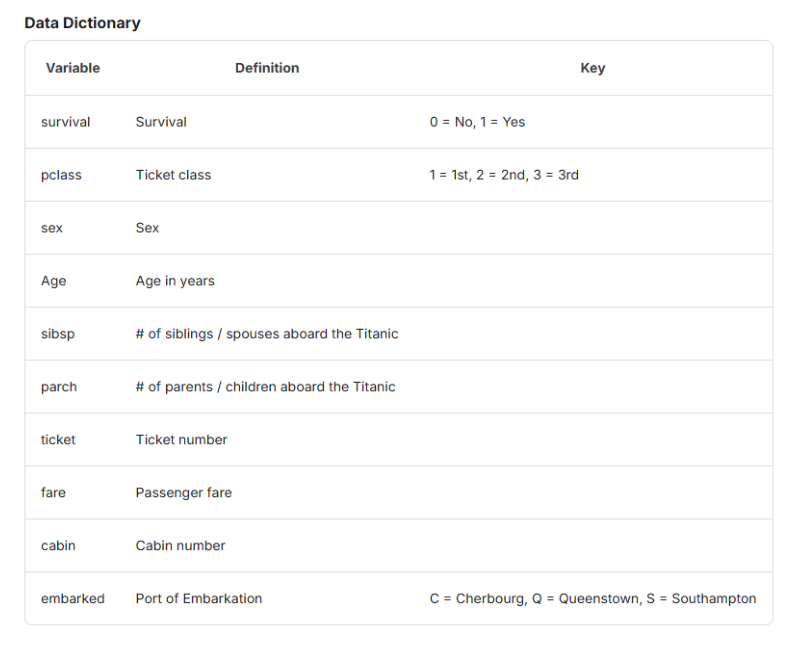

In [34]:
show_png("/content/drive/MyDrive/ML Projects/Titanic-Disaster/data/data dictionary.png")

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Problem statement

**Inputs:**


  1. passenger id which is Integer and has no missing value

  2. Pclass is integer and has no missing value, it must have 3 values for showing the class of the passengers like first class and economy and etc
  3. Name is object and has no missing value
  4. Sex is object and has no missing value
  5. Age is float and has around 160 missing value
  6. SibSp is integer and has no missing value, it shows siblings and partnerrs on board
  7. Parch is integer and has no missing value, it shows amount of parents and childrens on board
  8. ticket is object and has no missing values
  9.Fare is float and has no missing values
  10. Cabin is object and has 687 missing values
  11. Embarked is object and has 2 missing values


In this data set

**Output:**
   - Survived: is our target variable which must be predicted and is integer and has no missing value

## Submission Format

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

## Goals and Objectives

**Primary Goal:**

- Build a machine learning model that predicts the target variable with at least 80% score on the leadership board for this data set
https://www.kaggle.com/competitions/titanic/leaderboard


## Evaluations metrics

Since the project is binary classification we can use evaluation methodes below:

**Accuracy**
**Precision**
**Recall**
**F1**
**ROC,AUC**

## Checklist for Step 1

- ✅ Defined project title
- ✅ Defined project definitaion
- ✅ Wrote problem statement
- ✅ Identified target variable
- ✅ Selected evaluation mentrics based on the problem type

# Step 2: Exploratory Data Analysis (EDA-0)

# Univariate analysis

in this phase we try to look at each feature separatly and get a very detailed understanding of each feature and how its distributed, how many missing values we have and etc

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### PassengerId

In [40]:
df["PassengerId"].describe()

,PassengerId
count,891.000000
mean,446.000000
std,257.353842
min,1.000000
25%,223.500000
50%,446.000000
75%,668.500000
max,891.000000


In [43]:
print(len(df["PassengerId"].unique()))

891


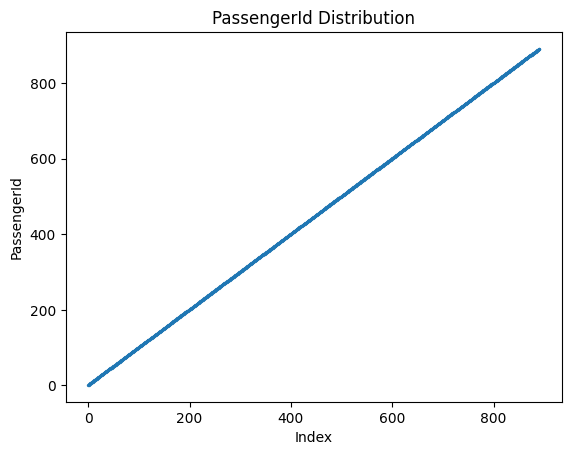

In [45]:
plt.scatter(df.index, df['PassengerId'], s=2)
plt.title("PassengerId Distribution")
plt.xlabel("Index")
plt.ylabel("PassengerId")
plt.show()

We dont have any missing value in Passenger ID feature, it starts at 1 and ends at 891, all values are unique and we dont have any duplicates value for this feature

### Pclass

In [48]:
df["Pclass"].describe()

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [52]:
print(df["Pclass"].value_counts().sum())
print(df["Pclass"].value_counts())
print(df["Pclass"].unique())
print(df["Pclass"].nunique())
print(df["Pclass"].isnull().sum())


891
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
[3 1 2]
3
0


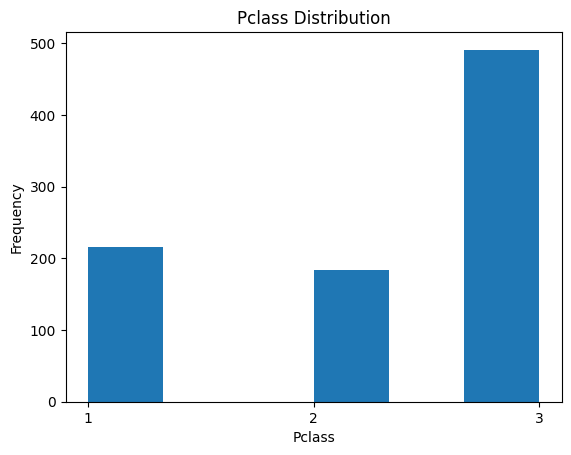

In [61]:
plt.hist(df["Pclass"], bins=6)
plt.title("Pclass Distribution")
plt.xticks([1, 2, 3])
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.show()

It seems we have no missing value and its already integer
most of the passengers have the lowest class on the ship with 491
second is first class with 216 passenger
and second class in the middle 184

### Name

In [68]:
print(df["Name"].info())
print(df["Name"].shape)
print(df["Name"].describe())
print(df["Name"].dtypes)
print(df["Name"].value_counts())
print(df["Name"].nunique())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
(891,)
count                     891
unique                    891
top       Dooley, Mr. Patrick
freq                        1
Name: Name, dtype: object
object
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: 

we dont have any missing value, no value is duplicated or repeated, its object , Name wont be very usable but maybe we can extract some data or labels out of it

In [70]:
pd.set_option("display.max_rows", None) # we can see all the rows and its not limited to 10 rows only
df["Name"].head(100)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


it seems after each family name we have a title for each person, we will extract that from name feature later and might be the case we onehot encode it

### Sex

In [78]:
print(df["Sex"].shape)
print(df["Sex"].value_counts())
print(df["Sex"].isnull().sum())

(891,)
Sex
male      577
female    314
Name: count, dtype: int64
0


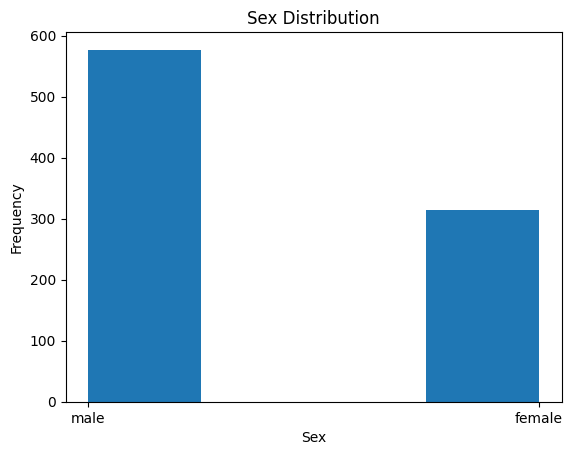

In [80]:
plt.hist(df["Sex"], bins=4)
plt.title("Sex Distribution")
plt.xticks([0, 1])
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

it seems Sex has no missing value and is integer with 314 Female and 577 Male, we can make it binary or onehot encode later

### Age

In [93]:
print("data type")
print(df["Age"].dtypes)
print("shape")
print(df['Age'].shape)
print("missing values")
print(df['Age'].isnull().sum())
print("describe")
print(df['Age'].describe())

data type
float64
shape
(891,)
missing values
177
describe
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


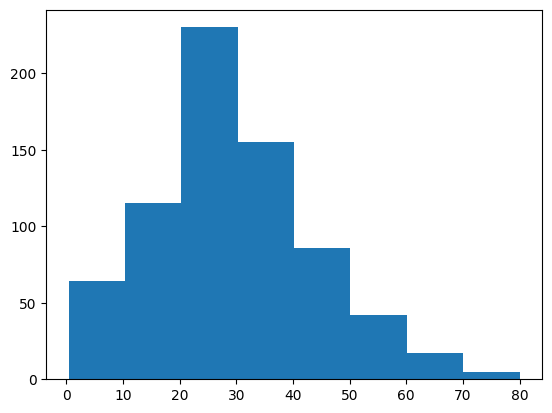

In [100]:
plt.hist(df["Age"], bins=8)
plt.show()

in age we have 177 values missing for passengers
what we can do later is to fill missing values with kind of grouping people based on their title p class and fare maybe, instead of just easily using mean or median
also since data is from very small value 0.42 to 80 and has a large range we can make it categorized like baby, teenage, adult, old, senior and so on

### SibSp

In [109]:
print("data type")
print(df["SibSp"].dtypes)
print("shape")
print(df['SibSp'].shape)
print("missing values")
print(df['SibSp'].isnull().sum())
print("describe")
print(df['SibSp'].describe())
print("counts")
print(df['SibSp'].value_counts())

data type
int64
shape
(891,)
missing values
0
describe
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
counts
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


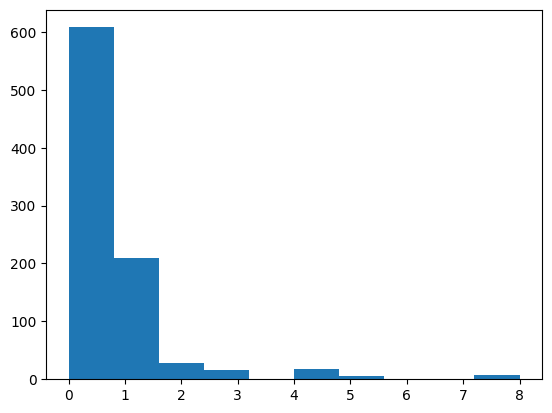

In [118]:
plt.hist(df["SibSp"], bins=10)
plt.show()

what we understand is that passengers traveling alone without spouse has the majority and the higher value for sibsp the less passengers what we can do later is adding up sibsp with parch and create a column called familiy size and also we can group sibsp in to some chunks like if 0 then alone 1 to 3 small family and more than 3 big family

### Parch

In [115]:
print(df["Parch"].shape)
print(df["Parch"].isnull().sum())
print(df["Parch"].dtypes)
print(df["Parch"].value_counts())
print(df["Parch"].value_counts().sum())

(891,)
0
int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
891


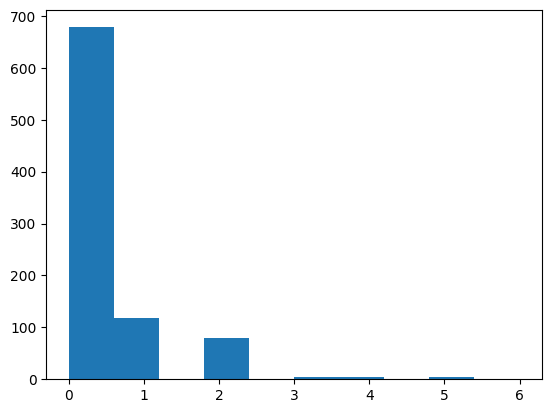

In [117]:
plt.hist(df["Parch"], bins=10)
plt.show()

same as Sibsp the higher is the value the less passenger we have, we have no missing value, majority belongs to parch 0, travelling alone, its integer
we can add this one to sibsp and create a new column called family group or family size also we can make this column chunked in to groups like alone, small family and large family

### Ticket

In [119]:
df["Ticket"].head(100)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [126]:
print(df["Ticket"].isnull().sum())
print(df["Ticket"].shape)
print(df["Ticket"].dtypes)
print(df["Ticket"].value_counts().sum)

0
(891,)
object
<bound method Series.sum of Ticket
347082                7
1601                  7
CA. 2343              7
3101295               6
CA 2144               6
347088                6
382652                5
S.O.C. 14879          5
113760                4
19950                 4
349909                4
347077                4
4133                  4
2666                  4
113781                4
17421                 4
W./C. 6608            4
LINE                  4
PC 17757              4
363291                3
347742                3
C.A. 31921            3
239853                3
13502                 3
PC 17760              3
PC 17582              3
F.C.C. 13529          3
110152                3
110413                3
PC 17755              3
371110                3
PC 17572              3
24160                 3
SC/Paris 2123         3
248727                3
C.A. 34651            3
345773                3
29106                 3
230080                3
35273        

 as it seems we have combination of letters and numbers for better understanding we need to split them in to numbers and prefix just to check what kind of prefixes we have

In [134]:
# Clean whitespace first
t = df["Ticket"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

# Split at the LAST space into [prefix, number] if possible
tmp = t.str.rsplit(" ", n=1, expand=True)

# Case 1: tickets with both prefix and number
df["Ticket_Prefix_raw"] = tmp[0]
df["Ticket_Number"]     = pd.to_numeric(tmp[1], errors="coerce").astype("Int64")

# Case 2: tickets that are PURE numbers (like "113803")
mask_numeric_only = t.str.fullmatch(r"\d+")
df.loc[mask_numeric_only, "Ticket_Prefix_raw"] = "NUM"
df.loc[mask_numeric_only, "Ticket_Number"] = t[mask_numeric_only].astype(int)

# Normalize prefix
df["Ticket_Prefix"] = (df["Ticket_Prefix_raw"]
                       .str.upper()
                       .str.replace(".", "", regex=False)
                       .str.replace("/", "", regex=False)
                       .str.replace(" ", "", regex=False))
print(df["Ticket_Prefix"].value_counts().head(15))
print(df[["Ticket", "Ticket_Prefix_raw", "Ticket_Prefix", "Ticket_Number"]].head(12))

Ticket_Prefix
NUM        661
PC          60
CA          41
A5          21
STONO2      18
SOTONOQ     15
SCPARIS     11
WC          10
A4           7
SOC          6
FCC          5
C            5
LINE         4
PP           3
WEP          3
Name: count, dtype: int64
              Ticket Ticket_Prefix_raw Ticket_Prefix  Ticket_Number
0          A/5 21171               A/5            A5          21171
1           PC 17599                PC            PC          17599
2   STON/O2. 3101282          STON/O2.        STONO2        3101282
3             113803               NUM           NUM         113803
4             373450               NUM           NUM         373450
5             330877               NUM           NUM         330877
6              17463               NUM           NUM          17463
7             349909               NUM           NUM         349909
8             347742               NUM           NUM         347742
9             237736               NUM           NUM   

In [135]:
df["Ticket_Number"].unique()

<IntegerArray>
[  21171,   17599, 3101282,  113803,  373450,  330877,   17463,  349909,
  347742,  237736,
 ...
  349212,  349217,  349257,    7552,   34068,  392076,  211536,  112053,
  111369,  370376]
Length: 679, dtype: Int64

no we have prefixes and numbers separated what we have as numbers are 679 unique values and 14 prefixes
maybe we should do encode for prefix and leave numbers with binary to show if they had numbers or not

### Fare

In [137]:
df["Fare"].head(5)

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


In [144]:
print(df["Fare"].dtypes)
print(df["Fare"].shape)
print(df["Fare"].describe())
print(df["Fare"].isnull().sum())
print(df["Fare"].value_counts())

float64
(891,)
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
0
Fare
8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
7.2292      15
26.5500     15
0.0000      15
7.8542      13
7.2500      13
8.6625      13
7.2250      12
16.1000      9
9.5000       9
15.5000      8
24.1500      8
69.5500      7
52.0000      7
56.4958      7
31.2750      7
14.4542      7
7.0500       7
14.5000      7
39.6875      6
46.9000      6
27.9000      6
21.0000      6
7.7958       6
26.2500      6
30.0000      6
15.2458      5
73.5000      5
53.1000      5
27.7208      5
30.5000      5
29.1250      5
21.0750      4
12.4750      4
15.8500      4
23.0000      4
79.2000      4
25.4667      4
11.5000      4
34.3750      4
263.0000     4
31.3875      4
35.5000      4
39.0000      4
7.7333       4
13.5000    

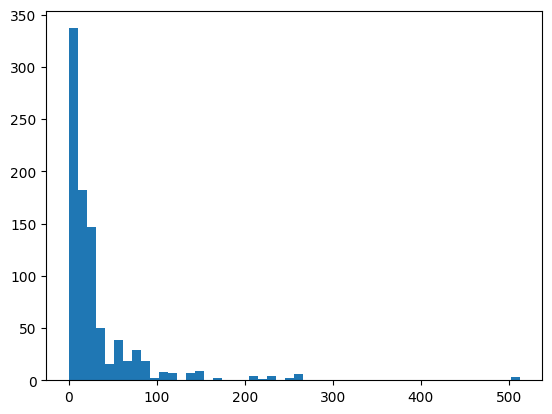

In [154]:
plt.hist(df["Fare"], bins=50 )
plt.show()

our Fare is not normal at all most of the passnegers paid below 30 dollars , our highest value is 512 and minimum 0 dollar so data is very spread and skewed to the right and we should fins a solution for that

 1. we can try logaritmic changes
 2. we can later try also categorizing them in to cheep to expensive groups like 4 or 5 groups

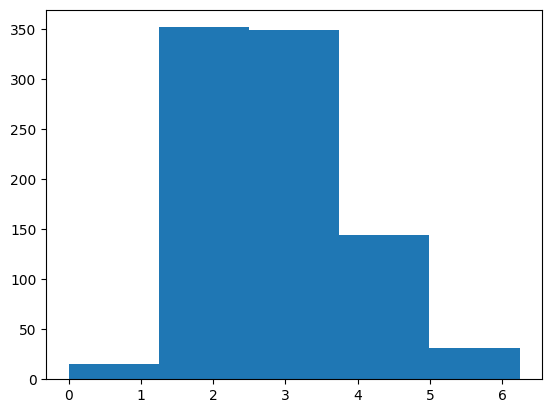

In [156]:
fare_log = np.log1p(df["Fare"]) #means log(1 + x)
plt.hist(fare_log, bins=5)
plt.show()

### Cabin

In [158]:
df["Cabin"].head(10)

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
5,NaN
6,E46
7,NaN
8,NaN
9,NaN


In [165]:
print(df["Cabin"].info())
print(df["Cabin"].shape)
print(df["Cabin"].value_counts())
print(df["Cabin"].describe())
print(df["Cabin"].isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
(891,)
Cabin
G6                 4
C23 C25 C27        4
B96 B98            4
F2                 3
D                  3
E101               3
C22 C26            3
F33                3
C83                2
C123               2
B28                2
D26                2
B58 B60            2
E33                2
D33                2
C52                2
F G73              2
B77                2
C93                2
B5                 2
D17                2
E24                2
E8                 2
E121               2
B35                2
E44                2
C92                2
C78                2
B20                2
C125               2
E67                2
D35                2
F4                 2
C2                 2
D36                2
C65                2
C124               2
B18    

as we see like Ticket it has also a combination of characters and numbers so maybe we can do the same and extract letters
also we have 687 out of 891 missing values which looks a lot and if we keep this feature we should add a feature for cabin missing and then assign missing as value to missing cabin cells
after some research usually those pclasses like 2 and 3 are the cabins that are missing but we will check later in multivariate phase

In [166]:
df["Cabin"] = df["Cabin"].fillna("Unknown").astype(str).str.strip()

# Take only the FIRST cabin if multiple are listed
df["Cabin_First"] = df["Cabin"].str.split().str[0]

# Extract deck letter (first alphabetic part)
df["CabinDeck"] = df["Cabin_First"].str.extract(r"([A-Za-z]+)")

# Extract cabin number (digits after the letters)
df["CabinNumber"] = pd.to_numeric(df["Cabin_First"].str.extract(r"(\d+)")[0],
                                  errors="coerce").astype("Int64")

# Special case: if Cabin is "Unknown", keep deck = "Unknown"
df.loc[df["Cabin"] == "Unknown", "CabinDeck"] = "Unknown"

# Quick check
print(df[["Cabin", "Cabin_First", "CabinDeck", "CabinNumber"]].head(20))

      Cabin Cabin_First CabinDeck  CabinNumber
0   Unknown     Unknown   Unknown         <NA>
1       C85         C85         C           85
2   Unknown     Unknown   Unknown         <NA>
3      C123        C123         C          123
4   Unknown     Unknown   Unknown         <NA>
5   Unknown     Unknown   Unknown         <NA>
6       E46         E46         E           46
7   Unknown     Unknown   Unknown         <NA>
8   Unknown     Unknown   Unknown         <NA>
9   Unknown     Unknown   Unknown         <NA>
10       G6          G6         G            6
11     C103        C103         C          103
12  Unknown     Unknown   Unknown         <NA>
13  Unknown     Unknown   Unknown         <NA>
14  Unknown     Unknown   Unknown         <NA>
15  Unknown     Unknown   Unknown         <NA>
16  Unknown     Unknown   Unknown         <NA>
17  Unknown     Unknown   Unknown         <NA>
18  Unknown     Unknown   Unknown         <NA>
19  Unknown     Unknown   Unknown         <NA>


### Embarked

In [167]:
df["Embarked"].head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [168]:
print(df["Embarked"].info())
print(df["Embarked"].shape)
print(df["Embarked"].value_counts())
print(df["Embarked"].describe())
print(df["Embarked"].isnull().sum())

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
(891,)
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
2


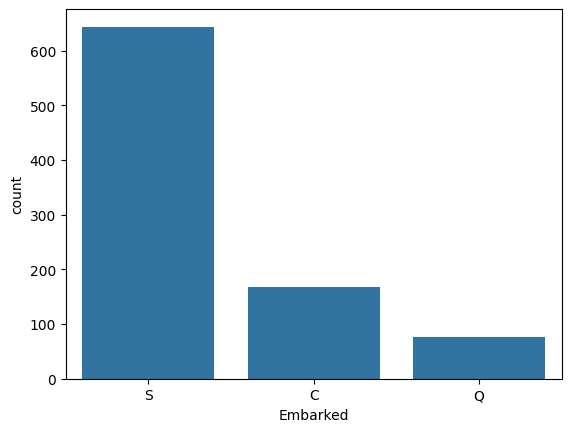

In [178]:
sns.countplot(x="Embarked", data=df)
plt.show()

as obvious in the our prints and bar chart we see that majority belongs to S which is southhampton and data is integer and we only have 2 missing values
we can take a look at fare and other values to detect these 2 missing embarked more precisly

## Bivariate Analysis

we will now create a function to separate our features in to date, numeric and categorical groups and then we will visualize each feature vs Target value to gain more insights about the relationships